# Simple RNN Implementation Using Keras/TensorFlow
Practical implementation of a Recurrent Neural Network using Keras (TensorFlow's high-level API)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [2]:
def generate_sequence_data(n_samples=1000, seq_length=20):
    """Generate simple sequential data for practice"""
    X = np.zeros((n_samples, seq_length, 1))
    y = np.zeros((n_samples, 1))

    for i in range(n_samples):
        start_val = np.random.uniform(0, 0.5)
        for t in range(seq_length):
            X[i,t,0] = start_val + t*0.1  # Simple increasing sequence
        y[i,0] = np.sin(X[i,-1,0])  # Predict sin of last value

    return X, y

In [5]:
# Generate data
from sklearn.model_selection import train_test_split

X, y = generate_sequence_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# SimpleRNN layer with 32 units (hidden states)
# return_sequences=False means we only get last output

model = Sequential([
    SimpleRNN(32, input_shape=(X.shape[1], X.shape[2]), activation='tanh'),

    Dense(1)])   # Fully connected output layerDense(1)])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
    validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.5579 - mae: 0.6311 - val_loss: 0.0257 - val_mae: 0.1537
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0111 - mae: 0.0892 - val_loss: 0.0034 - val_mae: 0.0455
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - mae: 0.0388 - val_loss: 0.0021 - val_mae: 0.0396
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - mae: 0.0366 - val_loss: 0.0018 - val_mae: 0.0362
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - mae: 0.0336 - val_loss: 0.0016 - val_mae: 0.0339
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - mae: 0.0336 - val_loss: 0.0015 - val_mae: 0.0316
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - mae: 0.0302 - val_loss: 0.0012 - val_mae: 0.0292
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.5361e-04 - mae: 0.0265 - val_loss: 0.0010 - val_mae: 0.0268
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.748

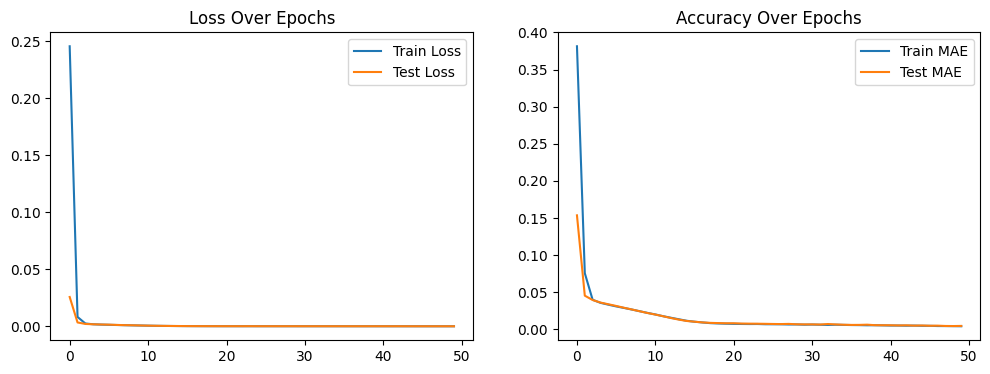

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

In [9]:
# Make predictions
sample_idx = 0
sample_input = X_test[sample_idx]
sample_true = y_test[sample_idx]
sample_pred = model.predict(sample_input[np.newaxis, ...])[0,0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


In [10]:
print(f"\nSample Prediction:")
print(f"Input sequence (last value): {sample_input[-1,0]:.4f}")
print(f"True output: {sample_true[0]:.4f}")
print(f"Predicted output: {sample_pred:.4f}")
print(f"Error: {abs(sample_true[0]-sample_pred):.4f}")


Sample Prediction:
Input sequence (last value): 2.1885
True output: 0.8152
Predicted output: 0.8090
Error: 0.0063
